In [ ]:
#MACHINE LEARNING PAT-3
#TITLE - Classifier Performance Comparison with Kaggle Dataset
#NAME - VINEET SINGH
#REGISTER NUMBER - 23MCA0181

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
#YOU CAN DOWNLOAD THE DATASET FROM KAGGLE
#AFTER DOWNLOADING THE DATASET WE WANT TO PREDICT THE CLASS OF CELL WHICH IS BENIGN(2) AND MALIGNANT(4)
#FOR USING THE DATASET FIRST WE REMOVE THE ID COLUMN
#WE USE ALL THE OTHER COLUMNS EXCEPT THE CLASS COLUMN FOR OUR PREDICITON
#FOR SOME OF THE CLASSIFIERS WE NEED TO STANDARDIZE THE DATA SO WE TRANSFORM THE DATASET USING STANDARDSCALER
#AFTER THIS WE USE TRAIN_TEST_SPLIT TO DIVIDE THE DATA INTO TRAINING AND TESTING SETS
#NOW WE USE THE TRAINING DATA FOR TRAINING OUR CLASSIFIER AND THE TESTING DATA FOR TESTING THE ACCURACY OF OUR CLASSIFIERS

In [ ]:

from google.colab import files
files.upload()

Saving cell_samples.csv to cell_samples.csv


{'cell_samples.csv': b'ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class\n1000025,5,1,1,1,2,1,3,1,1,2\n1002945,5,4,4,5,7,10,3,2,1,2\n1015425,3,1,1,1,2,2,3,1,1,2\n1016277,6,8,8,1,3,4,3,7,1,2\n1017023,4,1,1,3,2,1,3,1,1,2\n1017122,8,10,10,8,7,10,9,7,1,4\n1018099,1,1,1,1,2,10,3,1,1,2\n1018561,2,1,2,1,2,1,3,1,1,2\n1033078,2,1,1,1,2,1,1,1,5,2\n1033078,4,2,1,1,2,1,2,1,1,2\n1035283,1,1,1,1,1,1,3,1,1,2\n1036172,2,1,1,1,2,1,2,1,1,2\n1041801,5,3,3,3,2,3,4,4,1,4\n1043999,1,1,1,1,2,3,3,1,1,2\n1044572,8,7,5,10,7,9,5,5,4,4\n1047630,7,4,6,4,6,1,4,3,1,4\n1048672,4,1,1,1,2,1,2,1,1,2\n1049815,4,1,1,1,2,1,3,1,1,2\n1050670,10,7,7,6,4,10,4,1,2,4\n1050718,6,1,1,1,2,1,3,1,1,2\n1054590,7,3,2,10,5,10,5,4,4,4\n1054593,10,5,5,3,6,7,7,10,1,4\n1056784,3,1,1,1,2,1,2,1,1,2\n1057013,8,4,5,1,2,?,7,3,1,4\n1059552,1,1,1,1,2,1,3,1,1,2\n1065726,5,2,3,4,2,7,3,6,1,4\n1066373,3,2,1,1,1,1,2,1,1,2\n1066979,5,1,1,1,2,1,2,1,1,2\n1067444,2,1,1,1,2,1,2,1,1,2\n1070935,1,1,3,1,2,1,1,1,1,2\n1070935,

In [ ]:
df=pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

<ipython-input-5-18e0b8fc6dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc']=df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
X=np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [ ]:
df['Class']=df['Class'].astype('int')
y=np.asanyarray(df['Class'])
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

print("training : ",X_train.shape,y_train.shape)
print("testing : ",X_test.shape,y_test.shape)

training :  (546, 9) (546,)
testing :  (137, 9) (137,)


In [ ]:
from sklearn import svm
# Linear kernel
clf_linear = svm.SVC(kernel='linear').fit(X_train, y_train)

# Polynomial kernel
clf_poly = svm.SVC(kernel='poly').fit(X_train, y_train)

# RBF kernel
clf_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)

# Sigmoid kernel
clf_sigmoid = svm.SVC(kernel='sigmoid').fit(X_train, y_train)

In [ ]:
yhat_linear=clf_linear.predict(X_test)
print(yhat_linear)

yhat_poly=clf_poly.predict(X_test)
print(yhat_poly)

yhat_rbf=clf_rbf.predict(X_test)
print(yhat_rbf)

yhat_sigmoid=clf_sigmoid.predict(X_test)
print(yhat_sigmoid)

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4]
[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4]
[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4]
[2 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 4 4 2
 2 2 2 4 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4
 4 2 4 4 2 2 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For linear kernel
metrics = {}
metrics['linear'] = {
    'accuracy': accuracy_score(y_test, yhat_linear),
    'precision': precision_score(y_test, yhat_linear,average='weighted'),
    'recall': recall_score(y_test, yhat_linear,average='weighted'),
    'f1_score': f1_score(y_test, yhat_linear,average='weighted')
}

# For polynomial kernel
metrics['poly'] = {
    'accuracy': accuracy_score(y_test, yhat_poly),
    'precision': precision_score(y_test, yhat_poly,average='weighted'),
    'recall': recall_score(y_test, yhat_poly,average='weighted'),
    'f1_score': f1_score(y_test, yhat_poly,average='weighted')
}

# For RBF kernel
metrics['rbf'] = {
    'accuracy': accuracy_score(y_test, yhat_rbf),
    'precision': precision_score(y_test, yhat_rbf,average='weighted'),
    'recall': recall_score(y_test, yhat_rbf,average='weighted'),
    'f1_score': f1_score(y_test, yhat_rbf,average='weighted')
}

# For sigmoid kernel
metrics['sigmoid'] = {
    'accuracy': accuracy_score(y_test, yhat_sigmoid),
    'precision': precision_score(y_test, yhat_sigmoid,average='weighted'),
    'recall': recall_score(y_test, yhat_sigmoid,average='weighted'),
    'f1_score': f1_score(y_test, yhat_sigmoid,average='weighted')
}

# Print metrics
for kernel, scores in metrics.items():
    print(f"Metrics for {kernel} kernel:")
    print("Accuracy:", scores['accuracy'])
    print("Precision:", scores['precision'])
    print("Recall:", scores['recall'])
    print("F1-score:", scores['f1_score'])
    print()

Metrics for linear kernel:
Accuracy: 0.9635036496350365
Precision: 0.967012914093206
Recall: 0.9635036496350365
F1-score: 0.9639038982104676

Metrics for poly kernel:
Accuracy: 0.9708029197080292
Precision: 0.9730928867897524
Recall: 0.9708029197080292
F1-score: 0.9710669934861801

Metrics for rbf kernel:
Accuracy: 0.9635036496350365
Precision: 0.967012914093206
Recall: 0.9635036496350365
F1-score: 0.9639038982104676

Metrics for sigmoid kernel:
Accuracy: 0.39416058394160586
Precision: 0.35123220351232204
Recall: 0.39416058394160586
F1-score: 0.3714602361753353



In [ ]:
accuracy_linear = accuracy_score(y_test, yhat_linear)
accuracy_poly = accuracy_score(y_test, yhat_poly)
accuracy_rbf = accuracy_score(y_test, yhat_rbf)
accuracy_sigmoid = accuracy_score(y_test, yhat_sigmoid)

In [ ]:
#FOR KNN WE STANDARDIZE THE DATA FIRST IN CASE THE MODEL DOESNOT BECOME BIAS

In [ ]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm

array([[ 1.64275   ,  2.26468364,  2.31646537, ...,  2.7425329 ,
         2.27676132,  4.762086  ],
       [-0.87170355, -0.69270552, -0.72877562, ..., -0.16831429,
        -0.61494329, -0.34393421],
       [-0.15328825, -0.69270552, -0.72877562, ..., -0.99998492,
        -0.61494329, -0.34393421],
       ...,
       [-0.87170355, -0.03550793, -0.72877562, ..., -0.99998492,
        -0.61494329, -0.34393421],
       [-1.2309112 , -0.69270552, -0.72877562, ..., -0.16831429,
        -0.61494329, -0.34393421],
       [ 0.2059194 ,  0.29309087,  0.96302493, ...,  1.91086227,
         2.27676132, -0.34393421]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#lets consider the value of k as 4
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
X_test_norm=preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm

array([[-0.50928354, -0.74056896, -0.79487322, ..., -0.61610391,
        -0.60847763,  0.25533271],
       [ 0.16811301,  2.13088238,  2.11337213, ...,  1.30221962,
         2.62537114, -0.36932053],
       [ 0.16811301, -0.74056896, -0.79487322, ..., -0.61610391,
        -0.60847763, -0.36932053],
       ...,
       [-1.1866801 , -0.74056896, -0.79487322, ..., -0.61610391,
        -0.60847763, -0.36932053],
       [-0.17058526, -0.74056896, -0.79487322, ..., -0.2324392 ,
        -0.2491611 , -0.36932053],
       [ 1.86160441,  2.13088238,  2.11337213, ...,  0.53489021,
         0.11015543,  0.87998596]])

In [ ]:
yhat_knn=neigh.predict(X_test_norm)
yhat_knn[0:5]

array([2, 4, 2, 4, 2])

In [ ]:
print("Metric scores for knn")
accuracy_knn=accuracy_score(y_test, yhat_knn)
print("Accuracy:",accuracy_knn),
print("precision:",precision_score(y_test, yhat_knn,average='weighted')),
print("Recall:",recall_score(y_test, yhat_knn,average='weighted')),
print("F1 score:",f1_score(y_test, yhat_knn,average='weighted'))

Metric scores for knn
Accuracy: 0.9781021897810219
precision: 0.9794160583941607
Recall: 0.9781021897810219
F1 score: 0.9782552410493706


In [ ]:
#FOR DECISION TREE
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

dtree=DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
pred=dtree.predict(X_test)

In [ ]:
print (pred [0:5])
print (y_test [0:5])

[2 4 2 4 2]
[2 4 2 4 2]


In [ ]:
print("Metric scores for Decision Tree")
accuracy_decisionTree=accuracy_score(y_test, pred)
print("Accuracy:",accuracy_decisionTree),
print("precision:",precision_score(y_test, pred,average='weighted')),
print("Recall:",recall_score(y_test, pred,average='weighted')),
print("F1 score:",f1_score(y_test, pred,average='weighted'))

Metric scores for Decision Tree
Accuracy: 0.9708029197080292
precision: 0.9715308153785734
Recall: 0.9708029197080292
F1 score: 0.9709430274201044


In [ ]:
#for different values of depth

max_depth_values=[2,3,4,5,6,7,8,9,10]

for max_depth in max_depth_values:

  dtree1=DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  dtree1.fit(X_train,y_train)
  pred1=dtree1.predict(X_test)
  print(f"DecisionTrees's Accuracy with depth = {max_depth} is : ", accuracy_score(y_test, pred1))

DecisionTrees's Accuracy with depth = 2 is :  0.8905109489051095
DecisionTrees's Accuracy with depth = 3 is :  0.9781021897810219
DecisionTrees's Accuracy with depth = 4 is :  0.9708029197080292
DecisionTrees's Accuracy with depth = 5 is :  0.9781021897810219
DecisionTrees's Accuracy with depth = 6 is :  0.9708029197080292
DecisionTrees's Accuracy with depth = 7 is :  0.9708029197080292
DecisionTrees's Accuracy with depth = 8 is :  0.9708029197080292
DecisionTrees's Accuracy with depth = 9 is :  0.9635036496350365
DecisionTrees's Accuracy with depth = 10 is :  0.9708029197080292


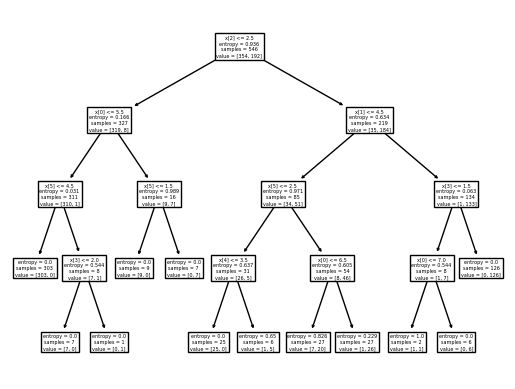

In [ ]:
tree.plot_tree(dtree)
plt.show()

In [ ]:
#FOR MULTI LAYER PERCEPTRON CLASSIFIER

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=4)

In [ ]:

# we use the standardized data for training here
mlp.fit(X_train_norm,y_train)


y_pred_mlp = mlp.predict(X_test_norm)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Metrics for Multi Layer Perceptron Classifier")
print("Accuracy: ",accuracy_mlp)
print("precision:",precision_score(y_test, y_pred_mlp,average='weighted')),
print("Recall:",recall_score(y_test, y_pred_mlp,average='weighted')),
print("F1 score:",f1_score(y_test, y_pred_mlp,average='weighted'))

Metrics for Multi Layer Perceptron Classifier
Accuracy:  0.9635036496350365
precision: 0.967012914093206
Recall: 0.9635036496350365
F1 score: 0.9639038982104676


In [ ]:
#FOR NAIVE BAYES
#for naive bayes also we use the standardized data for training

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(X_train_norm, y_train)
y_pred_nb = nb.predict(X_test_norm)

In [ ]:
print (y_pred_nb [0:5])
print (y_test [0:5])

[2 4 2 4 2]
[2 4 2 4 2]


In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Metrics for Naive Bayes classifier")
print("Accuracy: ",accuracy_mlp)
print("precision:",precision_score(y_test, y_pred_nb,average='weighted')),
print("Recall:",recall_score(y_test, y_pred_nb,average='weighted')),
print("F1 score:",f1_score(y_test, y_pred_nb,average='weighted'))

Metrics for Naive Bayes classifier
Accuracy:  0.9635036496350365
precision: 0.9611623743286049
Recall: 0.9562043795620438
F1 score: 0.9567631512710799


In [ ]:
#FOR PLOTTING THE ACCURACY OF DIFFERENT CLASSIFIERS

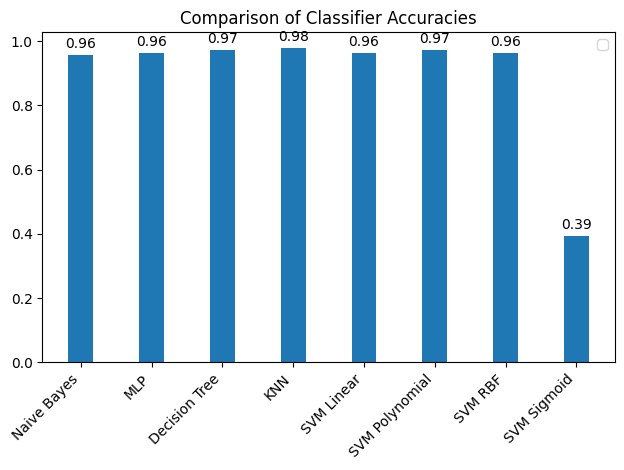

In [ ]:

classifiers = ['Naive Bayes', 'MLP', 'Decision Tree', 'KNN', 'SVM Linear', 'SVM Polynomial', 'SVM RBF', 'SVM Sigmoid']
accuracies = [accuracy_nb, accuracy_mlp, accuracy_decisionTree, accuracy_knn, accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]


# Create grouped bar chart
x = np.arange(len(classifiers))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, accuracies, width)

ax.set_title('Comparison of Classifier Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.legend()

# Add values on top of bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
